# Akshay's First Jupyter Notebook!

In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor


In [11]:
# comment

train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)


In [16]:
from torch.utils.data import DataLoader

loaders = {

    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),
    
    'test': DataLoader(test_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1)

}

In [17]:
loaders


{'train': <torch.utils.data.dataloader.DataLoader at 0x11a73e690>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x106bf5bb0>}

In [44]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) # kernel moves across and ret scores!
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5) # bigger kernel
        self.conv2_drop = nn.Dropout2d() # dropout layer
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):

        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        # print(f"After conv1 and max_pool2d: {x.shape}")
        
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        # print(f"After conv2, conv2_drop, and max_pool2d: {x.shape}")
        
        x = x.view(-1, 320)  # Flatten
        # print(f"After flattening: {x.shape}")
        
        x = F.relu(self.fc1(x))
        # print(f"After fc1: {x.shape}")
        
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        # print(f"After fc2: {x.shape}")
        
        return F.softmax(x, dim=1)  # Include dim=1 for softmax along the correct dimension

        
        

In [45]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # in case u have GPU

model = Net().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch): # training process!
    model.train() # put in training mode!
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)

        # calculate loss:
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        # Review This!
        if batch_idx % 20 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. *batch_idx / len(loaders['train']):.0f}%)]\t{loss.item():.6f})")

def test():
    model.eval()

    test_loss = 0 
    correct = 0

    with torch.no_grad():
        for data, target  in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True) # prediction!
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f"\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%\n)")
    

In [46]:
for epoch in range(1, 11):
    train(epoch)
    test()
    

Train Epoch: 1 [0/60000 (0%)]	2.302879)
Train Epoch: 1 [2000/60000 (3%)]	2.283473)
Train Epoch: 1 [4000/60000 (7%)]	2.133849)
Train Epoch: 1 [6000/60000 (10%)]	2.058207)
Train Epoch: 1 [8000/60000 (13%)]	1.912489)
Train Epoch: 1 [10000/60000 (17%)]	1.820083)
Train Epoch: 1 [12000/60000 (20%)]	1.760203)
Train Epoch: 1 [14000/60000 (23%)]	1.720025)
Train Epoch: 1 [16000/60000 (27%)]	1.726641)
Train Epoch: 1 [18000/60000 (30%)]	1.750404)
Train Epoch: 1 [20000/60000 (33%)]	1.662349)
Train Epoch: 1 [22000/60000 (37%)]	1.739111)
Train Epoch: 1 [24000/60000 (40%)]	1.706905)
Train Epoch: 1 [26000/60000 (43%)]	1.693145)
Train Epoch: 1 [28000/60000 (47%)]	1.621755)
Train Epoch: 1 [30000/60000 (50%)]	1.653069)
Train Epoch: 1 [32000/60000 (53%)]	1.743558)
Train Epoch: 1 [34000/60000 (57%)]	1.670620)
Train Epoch: 1 [36000/60000 (60%)]	1.630833)
Train Epoch: 1 [38000/60000 (63%)]	1.639689)
Train Epoch: 1 [40000/60000 (67%)]	1.662201)
Train Epoch: 1 [42000/60000 (70%)]	1.652826)
Train Epoch: 1 [44000

In [47]:
device


device(type='cpu')

Prediction: 6


<function matplotlib.pyplot.show(close=None, block=None)>

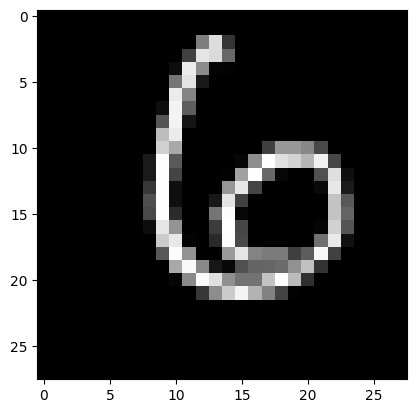

In [57]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[100]

data = data.unsqueeze(0).to(device)

output = model(data)

pred = output.argmax(dim=1, keepdim=True).item()

print(f"Prediction: {pred}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show